In [12]:
from display_images_from_paths_or_array import display_images
from PIL import Image
from skimage.feature import hog 
from skimage import data, exposure

import numpy as np 
import matplotlib.pyplot as plt 
import cv2

# **Deteksi Objek Menggunakan Kontur dan HOG Detector**
---

Deteksi objek adalah salah satu tugas penting dalam bidang visi komputer yang memungkinkan kita untuk mengidentifikasi dan melokalisasi objek tertentu dalam sebuah gambar. Metode yang umum digunakan untuk deteksi objek adalah penggunaan kontur dan Histogram of Oriented Gradients (HOG) detector.

#### **Kontur**

Kontur adalah batas-batas tertutup dalam gambar yang memiliki bentuk serupa. Dengan menemukan kontur, kita dapat mengidentifikasi dan menandai objek-objek dalam gambar berdasarkan bentuk mereka. Teknik ini sering digunakan dalam pengolahan citra karena kemampuannya untuk memisahkan objek dari latar belakang.

Dalam bagian ini, kita akan menggunakan kontur untuk mengklasifikasikan dan mendeteksi objek sederhana dalam gambar. Gambar yang akan kita gunakan terdiri dari apel dan jeruk, dan kita akan menggunakan metode deteksi tepi Canny serta kontur untuk mendeteksi objek-objek tersebut dan menuliskan nama kelas objek pada kotak pembatas (bounding box).

#### **Histogram of Oriented Gradients (HOG)**

HOG adalah fitur deskripsi yang digunakan dalam visi komputer dan pemrosesan citra untuk mendeteksi objek. HOG mengandalkan distribusi intensitas gradien atau arah tepi dalam sebuah gambar. Fitur ini sangat efektif untuk mendeteksi tepi dan bentuk dalam gambar, menjadikannya sangat berguna untuk deteksi objek yang berbasis pada bentuk dan tepi.

#### **Proses Deteksi**

1. **Pra-pemrosesan Gambar**:
   - Mengubah gambar ke dalam format grayscale untuk menyederhanakan pengolahan.
   - Menerapkan filter Gaussian untuk mengurangi noise dan menghaluskan gambar.

2. **Deteksi Tepi Menggunakan Metode Canny**:
   - Menggunakan algoritma deteksi tepi Canny untuk menemukan tepi-tepi dalam gambar. Algoritma ini bekerja dengan baik dalam menemukan tepi yang signifikan dan mengabaikan tepi yang tidak penting.

3. **Penemuan Kontur**:
   - Menggunakan metode penemuan kontur untuk menemukan batas-batas objek dalam gambar berdasarkan tepi yang telah dideteksi. Kontur-kontur ini kemudian digunakan untuk membuat kotak pembatas di sekitar objek.

4. **Klasifikasi Objek**:
   - Menganalisis bentuk kontur dan fitur HOG untuk mengklasifikasikan objek ke dalam kelas tertentu (misalnya, apel atau jeruk).
   - Menambahkan label nama kelas pada kotak pembatas untuk menandai objek yang terdeteksi.

#### **Kegunaan**

1. **Visi Komputer dan Pengolahan Citra**:
   - Digunakan dalam berbagai aplikasi visi komputer seperti sistem pengawasan, pengenalan wajah, deteksi kendaraan, dan pengolahan citra medis.

2. **Otomatisasi Industri**:
   - Membantu dalam otomatisasi proses produksi dengan mendeteksi dan mengklasifikasikan produk berdasarkan bentuk dan ukuran.

3. **Robotika**:
   - Membantu robot dalam navigasi dan manipulasi objek dengan mendeteksi dan mengenali objek dalam lingkungan mereka.

4. **Aplikasi Konsumen**:
   - Digunakan dalam aplikasi konsumen seperti filter kamera, pengenalan objek dalam aplikasi mobile, dan aplikasi augmented reality (AR).

Dengan memahami dan menguasai teknik-teknik deteksi objek menggunakan kontur dan HOG, kita dapat mengembangkan aplikasi yang lebih canggih dan akurat dalam berbagai bidang yang memerlukan analisis visual.

## **Deteksi Kontur**
---

Deteksi kontur adalah teknik dalam pengolahan citra yang digunakan untuk mengidentifikasi batas-batas objek dalam sebuah gambar. Teknik ini sering digunakan dalam berbagai aplikasi visi komputer seperti pengenalan objek, pelacakan objek, dan analisis bentuk.

#### Langkah-langkah Deteksi Kontur

1. **Impor Gambar**:
   - Langkah pertama adalah mengimpor gambar yang akan diproses. Gambar ini bisa dalam format berwarna atau grayscale.

2. **Deteksi Tepi dengan Metode Canny**:
   - Setelah gambar diimpor, kita menggunakan detektor tepi Canny untuk menemukan tepi-tepi dalam gambar. Detektor tepi Canny sangat efektif dalam mendeteksi tepi karena menggabungkan beberapa langkah seperti perataan gambar, menemukan gradien intensitas, dan deteksi tepi dengan ambang batas tertentu.

3. **Menemukan Kontur**:
   - Setelah tepi ditemukan, kita menggunakan metode `findContours` dari OpenCV untuk menemukan kontur dalam gambar. Kontur adalah garis atau kurva yang menghubungkan semua titik kontinu (tanpa putus) yang memiliki warna atau intensitas yang sama.

#### Contoh Kode

Berikut adalah contoh kode untuk mendeteksi kontur dalam sebuah gambar menggunakan OpenCV:

```python
import cv2

# Impor gambar
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Menggunakan detektor tepi Canny
threshold = 100
canny_output = cv2.Canny(img, threshold, threshold * 2)

# Menemukan kontur
contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menampilkan kontur
for contour in contours:
    cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)

# Menampilkan gambar dengan kontur yang ditandai
cv2.imshow('Contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

Penjelasan kode di atas:
- **Deteksi Tepi Canny**:
  ```python
  canny_output = cv2.Canny(img, threshold, threshold * 2)
  ```
  Deteksi tepi dilakukan dengan menggunakan fungsi `cv2.Canny` yang memerlukan dua parameter ambang batas. Parameter pertama adalah ambang batas bawah dan parameter kedua adalah ambang batas atas untuk deteksi tepi.

- **Menemukan Kontur**:
  ```python
  contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  ```
  Fungsi `cv2.findContours` digunakan untuk menemukan kontur dalam gambar. Fungsi ini memiliki tiga argumen:
  - Gambar hasil dari deteksi tepi Canny (`canny_output`).
  - Metode pengambilan kontur (`cv2.RETR_EXTERNAL`) yang digunakan untuk mengambil hanya kontur luar (eksternal) karena kita tertarik untuk menggambar kotak pembatas di sekitar objek.
  - Metode aproksimasi kontur (`cv2.CHAIN_APPROX_SIMPLE`) yang mengurangi jumlah titik dalam kontur dengan menghilangkan titik-titik yang tidak perlu.

- **Menggambar Kontur**:
  ```python
  for contour in contours:
      cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
  ```
  Menggambar kontur pada gambar asli menggunakan `cv2.drawContours`. Kontur ditandai dengan warna hijau dan ketebalan garis sebesar 2 piksel.

#### Kegunaan Deteksi Kontur

1. **Pengenalan Objek**:
   - Digunakan dalam sistem pengenalan objek untuk mengidentifikasi dan melokalisasi objek berdasarkan bentuk mereka.

2. **Pelacakan Objek**:
   - Berguna dalam aplikasi pelacakan objek di video untuk mengikuti pergerakan objek tertentu dari frame ke frame.

3. **Analisis Bentuk**:
   - Membantu dalam analisis bentuk objek dalam berbagai aplikasi seperti pengukuran dimensi, identifikasi bentuk, dan pengenalan pola.

4. **Robotika dan Otomasi**:
   - Membantu robot dalam navigasi dan manipulasi objek dengan mendeteksi dan mengenali objek berdasarkan kontur mereka.

Dengan mempelajari teknik deteksi kontur, kita dapat mengembangkan aplikasi yang lebih canggih dalam berbagai bidang seperti pengenalan objek, analisis gambar medis, sistem pengawasan, dan banyak lagi. Deteksi kontur adalah alat yang sangat berguna dalam pengolahan citra dan visi komputer yang memungkinkan kita untuk mengekstrak informasi penting dari gambar.

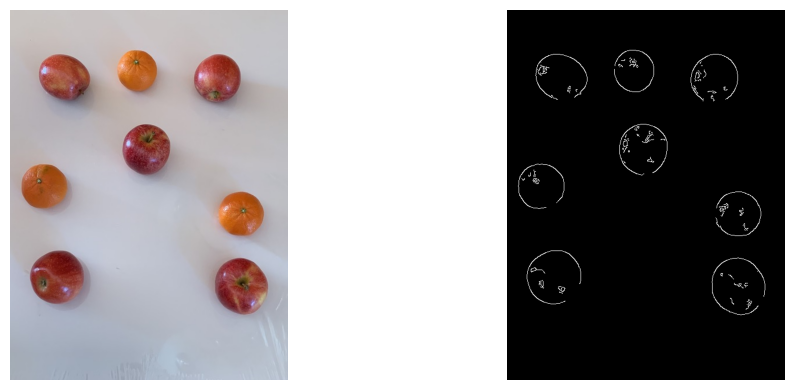

In [2]:
parent_path = './assets/'
image_rgb = cv2.imread(parent_path + 'appleorange.JPG', cv2.IMREAD_COLOR)
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

image_canny_filter = cv2.Canny(image=image_bgr, threshold1=150, threshold2=250)
contours, hierarchy = cv2.findContours(image_canny_filter, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

display_images(images=[image_bgr, image_canny_filter], figsize_per_image=(6,4), is_gray=True)

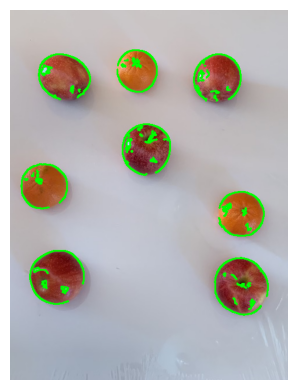

In [3]:
for contour in contours:
    cv2.drawContours(image_bgr, [contour], -1, (0, 255, 0), 2)
display_images(images=[image_bgr], figsize_per_image=(6,4))

## **Deteksi Kotak Pembatas**
---

Deteksi kotak pembatas adalah metode untuk menandai batas-batas objek dalam gambar dengan menggambar kotak di sekitar objek tersebut. Metode ini penting dalam berbagai aplikasi visi komputer untuk mengklasifikasikan dan melokalisasi objek.

#### Langkah-langkah Deteksi Kotak Pembatas

1. **Impor Gambar**:
   - Langkah pertama adalah mengimpor gambar yang akan diproses.

2. **Deteksi Tepi dengan Metode Canny**:
   - Menggunakan detektor tepi Canny untuk menemukan tepi-tepi dalam gambar.

3. **Menemukan Kontur**:
   - Menggunakan metode `findContours` dari OpenCV untuk menemukan kontur dalam gambar.

4. **Menentukan Kotak Pembatas**:
   - Untuk setiap kontur yang ditemukan, kita menggunakan properti `boundingRect` dari OpenCV untuk mendefinisikan kotak pembatas di sekitar kontur tersebut.

#### Contoh Kode

Berikut adalah contoh kode untuk mendeteksi kotak pembatas di sekitar objek dalam sebuah gambar menggunakan OpenCV:

```python
import cv2

# Impor gambar
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Menggunakan detektor tepi Canny
threshold = 100
canny_output = cv2.Canny(img, threshold, threshold * 2)

# Menemukan kontur
contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Font untuk penulisan teks
font = cv2.FONT_HERSHEY_SIMPLEX
count = 0

# Proses setiap kontur
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Hanya proses kontur yang ukurannya lebih dari 20x20 piksel
    if w > 20 and h > 20:
        count += 1
        
        # Menentukan ROI (Region of Interest)
        ROI = img[y+int(h/4):y+int(3*h/4), x+int(w/4):x+int(3*w/4)]
        ROI_meancolor = cv2.mean(ROI)
        
        # Cetak nomor kontur dan nilai mean warna ROI
        print(count, ROI_meancolor)
        
        # Klasifikasi berdasarkan nilai mean warna ROI
        if (ROI_meancolor[0] > 30 and ROI_meancolor[0] < 40 and 
            ROI_meancolor[1] > 70 and ROI_meancolor[1] < 105 and 
            ROI_meancolor[2] > 150 and ROI_meancolor[2] < 200):
            
            # Menandai kotak pembatas dan memberikan label "orange"
            cv2.putText(img, 'orange', (x-2, y-2), font, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)
            cv2.imshow('Contours', img)
        else:
            # Menandai kotak pembatas dan memberikan label "apple"
            cv2.putText(img, 'apple', (x-2, y-2), font, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)
            cv2.imshow('Contours', img)

cv2.waitKey(0)
cv2.destroyAllWindows()
```

#### Penjelasan Kode

- **Deteksi Tepi Canny**:
  ```python
  canny_output = cv2.Canny(img, threshold, threshold * 2)
  ```
  Deteksi tepi dilakukan dengan menggunakan fungsi `cv2.Canny`.

- **Menemukan Kontur**:
  ```python
  contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  ```
  Fungsi `cv2.findContours` digunakan untuk menemukan kontur dalam gambar.

- **Menentukan Kotak Pembatas**:
  ```python
  x, y, w, h = cv2.boundingRect(c)
  ```
  Fungsi `cv2.boundingRect` digunakan untuk menentukan kotak pembatas di sekitar kontur.

- **Menentukan Region of Interest (ROI)**:
  ```python
  ROI = img[y+int(h/4):y+int(3*h/4), x+int(w/4):x+int(3*w/4)]
  ```
  Menentukan ROI dari kontur untuk mengurangi area yang kosong di sekitar objek.

- **Menentukan Mean Warna ROI**:
  ```python
  ROI_meancolor = cv2.mean(ROI)
  ```
  Menghitung mean warna dari ROI untuk digunakan dalam klasifikasi objek.

- **Klasifikasi Objek**:
  ```python
  if (ROI_meancolor[0] > 30 and ROI_meancolor[0] < 40 and 
      ROI_meancolor[1] > 70 and ROI_meancolor[1] < 105 and 
      ROI_meancolor[2] > 150 and ROI_meancolor[2] < 200):
  ```
  Klasifikasi objek dilakukan berdasarkan nilai mean warna ROI.

#### Kegunaan Deteksi Kotak Pembatas

1. **Pengenalan dan Klasifikasi Objek**:
   - Digunakan dalam sistem pengenalan dan klasifikasi objek untuk menandai dan melabeli objek dalam gambar.

2. **Pelacakan Objek**:
   - Berguna dalam aplikasi pelacakan objek di video untuk mengikuti pergerakan objek dari frame ke frame.

3. **Pengukuran Dimensi**:
   - Membantu dalam pengukuran dimensi objek dalam berbagai aplikasi seperti pengukuran produk dalam industri manufaktur.

4. **Robotika dan Otomasi**:
   - Membantu robot dalam navigasi dan manipulasi objek dengan mendeteksi dan mengenali objek berdasarkan kotak pembatas mereka.

5. **Analisis Citra Medis**:
   - Digunakan dalam analisis citra medis untuk mendeteksi dan menandai area yang menarik dalam citra medis seperti tumor atau anomali lainnya.

Dengan mempelajari teknik deteksi kotak pembatas, kita dapat mengembangkan aplikasi yang lebih canggih dalam berbagai bidang seperti pengenalan objek, analisis gambar medis, sistem pengawasan, dan banyak lagi. Deteksi kotak pembatas adalah alat yang sangat berguna dalam pengolahan citra dan visi komputer yang memungkinkan kita untuk mengekstrak informasi penting dari gambar.

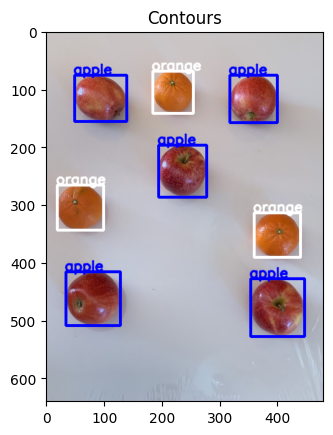

In [39]:
image_rgb = cv2.imread(parent_path + 'appleorange.JPG', cv2.IMREAD_COLOR)
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# Menggunakan detektor tepi Canny
threshold = 100
canny_output = cv2.Canny(image_bgr, threshold, threshold * 2)

# Menemukan kontur
contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Font untuk penulisan teks
font = cv2.FONT_HERSHEY_SIMPLEX
count = 0

# Proses setiap kontur
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Hanya proses kontur yang ukurannya lebih dari 20x20 piksel
    if w > 30 and h > 30:
        count += 1
        
        # Menentukan ROI (Region of Interest)
        ROI = image_bgr[y+int(h/4):y+int(3*h/4), x+int(w/4):x+int(3*w/4)]
        ROI_meancolor = cv2.mean(ROI)
        # Cetak nomor kontur dan nilai mean warna ROI
        # print(count, ROI_meancolor) # RGB format
        
        # Klasifikasi berdasarkan nilai mean warna ROI
        if (ROI_meancolor[2] > 30 and ROI_meancolor[2] < 40 and 
            ROI_meancolor[1] > 70 and ROI_meancolor[1] < 105 and 
            ROI_meancolor[0] > 150 and ROI_meancolor[0] < 200):
            
            # Menandai kotak pembatas dan memberikan label "orange"
            cv2.putText(image_bgr, 'orange', (x-2, y-2), font, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.rectangle(image_bgr, (x, y), (x+w, y+h), (255, 255, 255), 3)
            # cv2.imshow('Contours', image_bgr)
            plt.imshow(image_bgr)
            plt.title('Contours')
        else:
            # Menandai kotak pembatas dan memberikan label "apple"
            cv2.putText(image_bgr, 'apple', (x-2, y-2), font, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.rectangle(image_bgr, (x, y), (x+w, y+h), (0, 0, 255), 3)
            # cv2.imshow('Contours', image_bgr)
            plt.imshow(image_bgr)
            plt.title('Contours')

# cv2.waitKey(0)
# cv2.destroyAllWindows()

## **Detektor HOG (Histogram of Oriented Gradients)**
---

Histogram of Oriented Gradients (HOG) adalah fitur deskripsi yang sangat berguna dalam visi komputer untuk mendeteksi objek dalam gambar. Teknik ini memanfaatkan informasi gradien lokal dalam gambar untuk menemukan objek dengan pola yang mirip.

#### Pengantar HOG

HOG bekerja dengan cara menghitung histogram dari orientasi gradien dalam sel-sel kecil dari gambar. Gradien ini kemudian digunakan untuk membentuk fitur deskripsi yang dapat digunakan untuk membandingkan dan mengenali objek dalam gambar. Teknik ini sangat efektif dalam mendeteksi tepi dan bentuk objek, menjadikannya sangat berguna dalam berbagai aplikasi visi komputer seperti deteksi objek, pelacakan, dan pengenalan wajah.

#### Implementasi HOG dengan Scikit-Image

Untuk mengimplementasikan HOG, kita akan menggunakan pustaka `scikit-image`, yang menyediakan fungsi untuk menghitung HOG dan menghasilkan gambar HOG yang dapat divisualisasikan. Berikut adalah contoh kode untuk mengimpor HOG menggunakan `scikit-image` dan menggunakannya untuk memplot HOG dari gambar:

```python
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Impor gambar
img_rgb = cv2.imread(parent_path + 'appleorange.JPG', cv2.IMREAD_COLOR)
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

# Menghitung HOG
fruit, hog_image = hog(
    img_bgr, 
    orientations=8, 
    pixels_per_cell=(16, 16), 
    cells_per_block=(1, 1), 
    visualize=True, 
    channel_axis=-1,
)


# Reskalasi intensitas HOG image untuk visualisasi yang lebih baik
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Menampilkan gambar asli dan HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_bgr)
ax1.set_title('Original Image')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Image')

plt.show()
```

#### Penjelasan Kode

- **Menghitung HOG**:
  ```python
  fruit, hog_image = hog(img_gray, orientations=8, pixels_per_cell=(16, 16), 
                         cells_per_block=(1, 1), visualize=True, channel_axis=-1)
  ```
  Fungsi `hog` dari `skimage.feature` digunakan untuk menghitung HOG dari gambar. Argumen yang digunakan adalah:
  - `orientations=8`: Jumlah orientasi gradien yang dihitung.
  - `pixels_per_cell=(16, 16)`: Ukuran setiap sel dalam piksel.
  - `cells_per_block=(1, 1)`: Jumlah sel per blok.
  - `visualize=True`: Menghasilkan gambar HOG untuk visualisasi.

- **Reskalasi Intensitas HOG Image**:
  ```python
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  ```
  Menggunakan `exposure.rescale_intensity` untuk menyesuaikan intensitas gambar HOG sehingga lebih mudah divisualisasikan.

- **Menampilkan Gambar**:
  ```python
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
  ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  plt.show()
  ```
  Menggunakan `matplotlib` untuk menampilkan gambar asli dan gambar HOG.

#### Hasil dan Observasi

- **Gambar Asli dan Gambar HOG**:
  - Gambar di sebelah kiri menunjukkan gambar asli dengan kotak pembatas.
  - Gambar di sebelah kanan menunjukkan HOG dari setiap objek dalam gambar.

- **Deteksi Objek**:
  - Setiap apel dan jeruk terdeteksi dengan benar, dengan kotak pembatas yang mengelilingi buah tanpa tumpang tindih.
  - Deskriptor HOG menunjukkan kotak pembatas persegi panjang dengan gradien yang menunjukkan pola melingkar.

#### Kegunaan HOG

1. **Deteksi Objek**:
   - Digunakan dalam sistem deteksi objek untuk mengenali dan melokalisasi objek dalam gambar berdasarkan pola gradien mereka.

2. **Pengenalan Wajah**:
   - HOG sering digunakan dalam pengenalan wajah karena kemampuannya untuk menangkap informasi tepi dan bentuk yang penting dalam identifikasi wajah.

3. **Pelacakan Objek**:
   - Berguna dalam aplikasi pelacakan objek untuk mengikuti pergerakan objek dari frame ke frame dalam video.

4. **Analisis Bentuk**:
   - Membantu dalam analisis bentuk objek dalam berbagai aplikasi seperti pengukuran dimensi dan identifikasi bentuk.

5. **Keamanan dan Pengawasan**:
   - Digunakan dalam sistem keamanan dan pengawasan untuk mendeteksi orang atau objek tertentu dalam rekaman video.

Dengan mempelajari dan menguasai teknik HOG, kita dapat mengembangkan aplikasi yang lebih canggih dan akurat dalam berbagai bidang yang memerlukan analisis visual. HOG adalah alat yang sangat berguna dalam pengolahan citra dan visi komputer yang memungkinkan kita untuk mengekstrak informasi penting dari gambar dan menggunakannya untuk mendeteksi, mengenali, dan melacak objek.

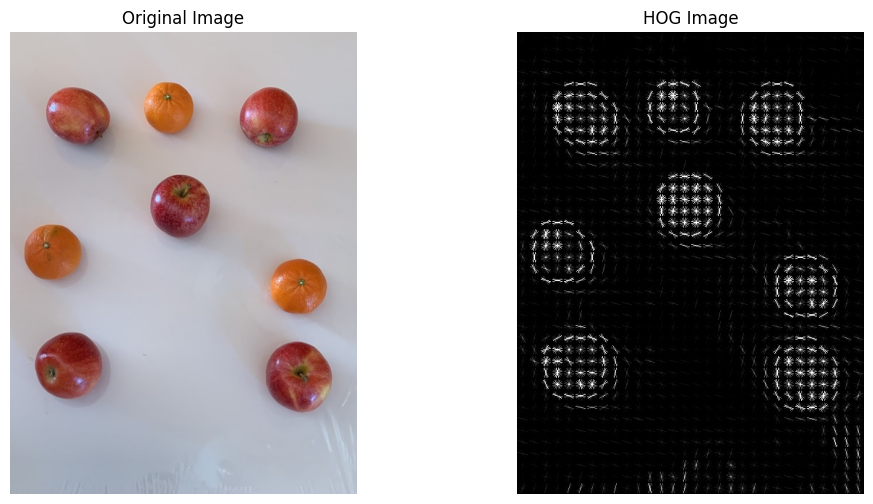

In [45]:
# Impor gambar
img_rgb = cv2.imread(parent_path + 'appleorange.JPG', cv2.IMREAD_COLOR)
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

# Menghitung HOG
fruit, hog_image = hog(
    img_bgr, 
    orientations=8, 
    pixels_per_cell=(16, 16), 
    cells_per_block=(1, 1), 
    visualize=True, 
    channel_axis=-1,
)


# Reskalasi intensitas HOG image untuk visualisasi yang lebih baik
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 5))

# Menampilkan gambar asli dan HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_bgr)
ax1.set_title('Original Image')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Image')

plt.show()

## **Keterbatasan Metode Deteksi Kontur**
---

Metode deteksi kontur menggunakan teknik Canny edge detection dan metode `findContours` pada OpenCV telah terbukti efektif untuk mendeteksi objek sederhana seperti apel dan jeruk tanpa perlu pelatihan sebelumnya. Namun, metode ini memiliki keterbatasan, terutama ketika kondisi gambar berubah atau objek yang lebih kompleks ditambahkan. Berikut adalah beberapa variasi yang memperlihatkan kelemahan metode ini:

1. **Penambahan Objek Lain**:
   - Ketika objek lain yang bukan apel atau jeruk ditambahkan ke gambar, metode ini mungkin tidak dapat membedakan objek tersebut dengan benar karena parameter lebar dan tinggi yang dipilih terlalu luas.

2. **Penambahan Objek dengan Bentuk Serupa**:
   - Jika ada objek lain dengan bentuk yang serupa (misalnya lingkaran), metode ini akan mendeteksinya sebagai apel atau jeruk karena tidak ada parameter tambahan untuk membedakannya.

3. **Perubahan Intensitas Cahaya dan Refleksi**:
   - Perubahan dalam pencahayaan dan refleksi dapat mempengaruhi nilai RGB dari objek yang dideteksi, menyebabkan deteksi yang salah.

Sebagai contoh, jika kita menambahkan objek lain dan mengubah intensitas cahaya, hasil deteksi akan berubah seperti berikut:

```python
import cv2

# Baca gambar baru
img = cv2.imread('new_image.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny edge detection
threshold = 100
canny_output = cv2.Canny(img_gray, threshold, threshold * 2)

# Temukan kontur
contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inisialisasi
count = 0
font = cv2.FONT_HERSHEY_SIMPLEX

# Loop melalui setiap kontur
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w > 60 and w < 100 and h > 60 and h < 120):  # Ubah ukuran parameter
        count += 1
        ROI = img[y + int(h / 4):y + int(3 * h / 4), x + int(h / 4):x + int(3 * h / 4)]
        ROI_meancolor = cv2.mean(ROI)
        print(count, ROI_meancolor)
        if (ROI_meancolor[0] > 10 and ROI_meancolor[0] < 40 and ROI_meancolor[1] > 65 and ROI_meancolor[1] < 105):
            cv2.putText(img, 'orange', (x - 2, y - 2), font, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 3)
        else:
            cv2.putText(img, 'apple', (x - 2, y - 2), font, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3)

cv2.imshow('Contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

Pada contoh di atas, kami mempersempit parameter ukuran (`w` dan `h`) serta nilai RGB untuk meningkatkan akurasi deteksi. Meskipun demikian, metode ini tetap terbatas karena:

- Objek non-lingkaran seperti remote control, garpu, dan pisau tidak terdeteksi dengan benar karena bentuk HOG yang berbeda.
- Cangkir plastik dengan bentuk serupa tidak terdeteksi karena variabel tambahan seperti pencahayaan dan refleksi tidak dipertimbangkan.

### Kesimpulan

Metode deteksi kontur sederhana memiliki keterbatasan yang signifikan saat diterapkan pada dataset gambar yang lebih besar dan lebih kompleks. Variasi dalam pencahayaan, bentuk, ukuran, dan orientasi objek memerlukan penyesuaian parameter yang konstan, membuat metode ini tidak efektif untuk aplikasi yang lebih luas.

Untuk mengatasi keterbatasan ini, pendekatan yang lebih canggih seperti Convolutional Neural Networks (CNN) dapat digunakan. CNN mampu belajar dari berbagai kondisi pencahayaan, bentuk, dan ukuran selama proses pelatihan, memungkinkan deteksi objek yang lebih akurat dan andal.

### Kegunaan Mempelajari Metode Ini

1. **Pemahaman Dasar**:
   - Mempelajari metode deteksi kontur memberikan pemahaman dasar tentang bagaimana teknik pengolahan citra dan deteksi objek bekerja.

2. **Penggunaan Praktis**:
   - Meskipun terbatas, metode ini dapat digunakan untuk aplikasi sederhana di mana kondisi gambar relatif konsisten, seperti deteksi objek dalam lingkungan yang terkontrol.

3. **Perbandingan dengan Teknik Lain**:
   - Mengetahui keterbatasan metode ini membantu dalam memahami kebutuhan untuk teknik yang lebih maju seperti CNN dan bagaimana mereka mengatasi kekurangan metode dasar.

4. **Deteksi Berbasis Warna**:
   - Teknik ROI_meancolor dapat digunakan untuk aplikasi yang memerlukan pemisahan objek berdasarkan warna, seperti mengenali pemain dalam pertandingan olahraga berdasarkan warna seragam atau membedakan apel hijau dari apel merah.

Dengan pemahaman yang mendalam tentang metode ini, kita dapat lebih siap untuk mengembangkan dan mengimplementasikan solusi deteksi objek yang lebih canggih dan efektif menggunakan teknik pembelajaran mesin dan deep learning.

1 (178.6521739130435, 90.01219512195122, 26.551961823966067, 0.0)
2 (111.43055555555557, 47.23232323232324, 33.08522727272727, 0.0)
3 (146.56770833333334, 89.10748106060606, 66.33522727272728, 0.0)
4 (140.75252525252526, 53.105555555555554, 31.844444444444445, 0.0)
5 (142.0997732426304, 67.3078231292517, 12.990362811791384, 0.0)
6 (122.63804878048781, 60.289756097560975, 36.26682926829268, 0.0)
7 (165.83875968992245, 80.07286821705425, 46.09560723514212, 0.0)
8 (159.11819887429644, 68.10006253908693, 44.925578486554095, 0.0)
9 (190.0766253869969, 97.61377708978328, 21.68575851393189, 0.0)


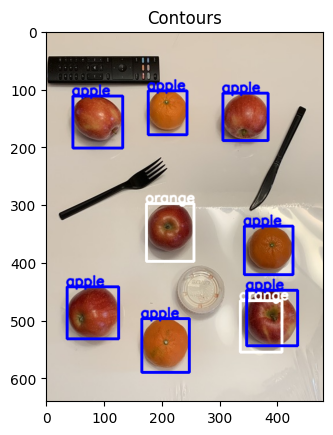

In [54]:
image_rgb = cv2.imread(parent_path + 'appleorangeother.JPG', cv2.IMREAD_COLOR)
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# Menggunakan detektor tepi Canny
threshold = 100
canny_output = cv2.Canny(image_bgr, threshold, threshold * 2)

# Menemukan kontur
contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Font untuk penulisan teks
font = cv2.FONT_HERSHEY_SIMPLEX
count = 0

# Proses setiap kontur
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    if (w >60 and w < 100 and h >60 and h <120): 
        count += 1
        
        # Menentukan ROI (Region of Interest)
        ROI = image_bgr[y+int(h/4):y+int(3*h/4), x+int(w/4):x+int(3*w/4)]
        ROI_meancolor = cv2.mean(ROI)
        # Cetak nomor kontur dan nilai mean warna ROI
        print(count, ROI_meancolor) # RGB format
        
        # Klasifikasi berdasarkan nilai mean warna ROI
        if (ROI_meancolor[2] > 30 and ROI_meancolor[2] < 38 and 
            ROI_meancolor[1] > 45 and ROI_meancolor[1] < 61 and 
            ROI_meancolor[0] > 110 and ROI_meancolor[0] < 125):
            
            # Menandai kotak pembatas dan memberikan label "orange"
            cv2.putText(image_bgr, 'orange', (x-2, y-2), font, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.rectangle(image_bgr, (x, y), (x+w, y+h), (255, 255, 255), 3)
            # cv2.imshow('Contours', image_bgr)
            plt.imshow(image_bgr)
            plt.title('Contours')
        else:
            # Menandai kotak pembatas dan memberikan label "apple"
            cv2.putText(image_bgr, 'apple', (x-2, y-2), font, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.rectangle(image_bgr, (x, y), (x+w, y+h), (0, 0, 255), 3)
            # cv2.imshow('Contours', image_bgr)
            plt.imshow(image_bgr)
            plt.title('Contours')

# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Ringkasan

Dalam bab ini, kita mempelajari bagaimana penyaringan gambar memodifikasi gambar input melalui operasi konvolusi untuk menghasilkan output yang mendeteksi bagian dari fitur yang disebut tepi. Ini adalah dasar dari penglihatan komputer. Seperti yang akan Anda pelajari di bab-bab berikutnya, penerapan penyaringan gambar selanjutnya akan mengubah tepi menjadi pola tingkat yang lebih tinggi, seperti fitur-fitur.

#### Penyaringan Gambar
Penyaringan gambar adalah proses di mana gambar dimodifikasi menggunakan kernel atau filter tertentu melalui operasi konvolusi. Misalnya, dalam deteksi tepi, filter Sobel atau Canny digunakan untuk menyoroti tepi-tepi dalam gambar. Ini penting karena tepi merupakan fitur dasar yang digunakan dalam berbagai aplikasi penglihatan komputer, seperti deteksi objek dan segmentasi gambar.

#### Histogram Gambar
Kita juga mempelajari cara menghitung histogram gambar. Histogram gambar adalah representasi distribusi pixel dalam gambar berdasarkan intensitasnya. Misalnya, untuk gambar grayscale, histogram menunjukkan jumlah pixel untuk setiap nilai intensitas dari 0 hingga 255. Histogram ini berguna untuk berbagai tugas pengolahan citra, seperti penyesuaian kontras, segmentasi, dan deteksi objek.

#### Pencocokan Gambar Menggunakan SIFT
Kita mempelajari bagaimana melakukan pencocokan gambar menggunakan Scale-Invariant Feature Transform (SIFT). SIFT adalah algoritma yang mendeteksi dan mendeskripsikan fitur lokal dalam gambar yang bersifat invarian terhadap skala dan rotasi. Misalnya, SIFT dapat digunakan untuk mencocokkan fitur-fitur antara dua gambar yang diambil dari sudut pandang yang berbeda.

#### Deteksi Kontur dan HOG
Kita juga belajar menggunakan deteksi kontur dan Histogram of Oriented Gradients (HOG) untuk menggambar kotak pembatas (bounding box). Deteksi kontur digunakan untuk mendeteksi tepi objek dan kemudian menggambar kotak pembatas di sekitar objek tersebut. HOG adalah teknik yang digunakan untuk mendeskripsikan fitur bentuk objek dalam gambar.

#### Pengantar TensorFlow
Bab ini juga memperkenalkan TensorFlow, sebuah library open-source yang digunakan untuk machine learning dan deep learning. TensorFlow menyediakan fondasi yang kuat untuk implementasi dan pelatihan model neural network, yang akan dibahas lebih lanjut dalam bab-bab berikutnya.

#### Kegunaan Memahami Materi Ini
Memahami teknik-teknik dasar ini penting untuk berbagai alasan:

1. **Dasar Pengolahan Citra**:
   - Penyaringan gambar, deteksi tepi, dan histogram adalah dasar dari pengolahan citra yang digunakan dalam berbagai aplikasi penglihatan komputer.

2. **Pencocokan dan Deteksi Objek**:
   - Teknik-teknik seperti SIFT dan HOG digunakan untuk pencocokan dan deteksi objek, yang penting dalam banyak aplikasi seperti pengenalan wajah, deteksi objek, dan pengawasan.

3. **Segregasi Objek Berdasarkan Warna dan Ukuran**:
   - Memahami bagaimana menggunakan warna dan ukuran untuk membedakan satu objek dari yang lain adalah keterampilan yang berguna dalam aplikasi praktis, seperti pemisahan objek dalam penglihatan mesin industri.

4. **Dasar untuk Teknik Lanjutan**:
   - Memahami teknik dasar ini memberikan fondasi yang kuat untuk mempelajari teknik yang lebih maju seperti Convolutional Neural Networks (CNN) dan metode deep learning lainnya yang digunakan untuk tugas-tugas yang lebih kompleks dalam penglihatan komputer.

### Kesimpulan
Dengan menguasai teknik dasar pengolahan citra, pencocokan fitur, deteksi objek, dan pengenalan pola, kita membangun fondasi yang kuat untuk eksplorasi lebih lanjut dalam bidang penglihatan komputer dan pembelajaran mesin. Ini memungkinkan kita untuk memahami dan mengimplementasikan solusi yang lebih kompleks dan efisien untuk berbagai masalah pengolahan citra dan pengenalan objek.